In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import netCDF4 as nc

In [2]:
import sys

sys.path.append('../../')

from nc_explorer import NcExplorer
from tsgen import TsGenerator

tsg = TsGenerator()
exp = NcExplorer()

sen3r-NcExplorer: from mpl_toolkits.basemap import Basemap FAILED!You can still proceed without plotting any maps.
Declaring class instance from: SEN3R:Nc_Explorer
Input NetCDF file folder not set. Proceed at your own risk.
Declaring class instance from: SEN3R:Nc_Explorer
Input NetCDF file folder not set. Proceed at your own risk.


## Default (non-parallel)

In [3]:
# Just a small refactoring of the old code
def get_x_y(lat_arr, lon_arr, lat, lon):

    grid = np.concatenate([lat_arr[..., None], lon_arr[..., None]], axis=2)
    
    vector = np.array([lat, lon]).reshape(1, 1, -1)
    subtraction = vector - grid 
    dist = np.linalg.norm(subtraction, axis=2)
    result = np.where(dist == dist.min())
    target_x_y = result[0][0], result[1][0]
    
    return target_x_y
    
# considering that creating the 2D grid consumes memory, we will get all coordinates in just one pass
def get_x_y_poly(lat_arr, lon_arr, polyline):
    grid = np.concatenate([lat_arr[..., None], lon_arr[..., None]], axis=2)
    
    # Polyline is a GeoJSON coordinate array
    polyline = polyline.squeeze()
    
    # loop through each vertice
    vertices = []
    for i in range(polyline.shape[0]):
        
        vector = np.array([polyline[i, 1], polyline[i, 0]]).reshape(1, 1, -1)
        subtraction = vector - grid 
        dist = np.linalg.norm(subtraction, axis=2)
        result = np.where(dist == dist.min())
        target_x_y = [result[0][0], result[1][0]]
        
        vertices.append(target_x_y)
    return np.array(vertices)

def bbox(vertices):
    "Get the bounding box of the vertices. Just for visualization purposes"
    ymin = np.min(vertices[:,0])
    ymax = np.max(vertices[:,0])    
    xmin = np.min(vertices[:,1])
    xmax = np.max(vertices[:,1])        
    return xmin, xmax, ymin, ymax


## Parallel

In [4]:
from parallel_get_xy_poly import ParallelCoord
import time

In [5]:
gpc = ParallelCoord()

In [7]:
# Estimate AOT from 865nm

In [8]:
# aot550 = np.array(aot865)*(865/550)**np.array(ang)

## Testing over all available bands

In [6]:
# WFR - UNIX
# path = Path('/d_drive_data/S3/L2_WFR/S3A_OL_2_WFR____20191104T135002_20191104T135302_20191124T134508_0179_051_124_3060_MAR_O_NT_002.SEN3')

# SYN - UNIX
path = Path('/d_drive_data/S3/SY_2_SYN/S3A_SY_2_SYN____20191104T135002_20191104T135302_20191106T033418_0180_051_124_3060_LN2_O_NT_002.SEN3')

path.exists()

True

In [7]:
exp.nc_folder = path

In [8]:
ncfs = exp.get_valid_band_files(rad_only=False)
ncfs

['Syn_Oa21_reflectance.nc',
 'flags.nc',
 'geolocation.nc',
 'Syn_AMIN.nc',
 'Syn_Angstrom_exp550.nc',
 'Syn_annot_rem.nc',
 'Syn_AOT550.nc',
 'Syn_Oa01_reflectance.nc',
 'Syn_Oa02_reflectance.nc',
 'Syn_Oa03_reflectance.nc',
 'Syn_Oa04_reflectance.nc',
 'Syn_Oa05_reflectance.nc',
 'Syn_Oa06_reflectance.nc',
 'Syn_Oa07_reflectance.nc',
 'Syn_Oa08_reflectance.nc',
 'Syn_Oa09_reflectance.nc',
 'Syn_Oa10_reflectance.nc',
 'Syn_Oa11_reflectance.nc',
 'Syn_Oa12_reflectance.nc',
 'Syn_Oa16_reflectance.nc',
 'Syn_Oa17_reflectance.nc',
 'Syn_Oa18_reflectance.nc',
 'Syn_S1N_reflectance.nc',
 'Syn_S1O_reflectance.nc',
 'Syn_S2N_reflectance.nc',
 'Syn_S2O_reflectance.nc',
 'Syn_S3N_reflectance.nc',
 'Syn_S3O_reflectance.nc',
 'Syn_S5N_reflectance.nc',
 'Syn_S5O_reflectance.nc',
 'Syn_S6N_reflectance.nc',
 'Syn_S6O_reflectance.nc',
 'Syn_SDR_removed_pixel.nc',
 'tiepoints_meteo.nc',
 'tiepoints_olci.nc',
 'tiepoints_slstr_n.nc',
 'tiepoints_slstr_o.nc',
 'time.nc']

In [12]:
# for f in ncfs:
#     ds = nc.Dataset(path/f)
#     print(f)
#     print('+++++++')
#     print(ds.dimensions)
#     print(ds.variables)
#     print('--------------------------------')

In [21]:
# Open one band
ds = nc.Dataset(path/'Syn_AOT550.nc')
band = ds['T550'][:]
bname = 'T550'

In [22]:
# SYN COORDS
dsgeo = nc.Dataset(path/'geolocation.nc')
g_lat = dsgeo['lat'][:]
g_lon = dsgeo['lon'][:]

In [10]:
# # Open one band
# ds = nc.Dataset(path/'Syn_Angstrom_exp550.nc')
# band = ds['A550'][:]
# bname = 'Ang550'

In [11]:
# # Open one band
# ds = nc.Dataset(path/'Syn_Oa17_reflectance.nc')
# band = ds['SDR_Oa17'][:]
# bname = 'SDR_Oa17'

In [12]:
# # Open one band
# ds = nc.Dataset(path/'Oa17_reflectance.nc')
# band = ds['Oa17_reflectance'][:]
# bname = 'Oa17_reflectance'

In [13]:
# # Open one tie band
# ds = nc.Dataset(path/'tie_geometries.nc')
# band = ds['SZA'][:]
# bname = 'SZA'

In [14]:
# # WFR COORDS
# dsgeo = nc.Dataset(path/'geo_coordinates.nc')
# g_lat = dsgeo['latitude'][:]
# g_lon = dsgeo['longitude'][:]

In [15]:
# # WFR TIE_COORDS
# tie_geo = nc.Dataset(path/'tie_geo_coordinates.nc')
# t_lat = tie_geo['latitude'][:]
# t_lon = tie_geo['longitude'][:]

In [16]:
# Manacapuru
# polygon = np.array([ [ [ -61.304292937753878, -3.580746157823998, 0.0 ], [ -61.189738482291098, -3.570230611586103, 0.0 ], [ -61.051796038163282, -3.570623959031377, 0.0 ], [ -60.971175020538652, -3.593840244684938, 0.0 ], [ -60.9034262153111, -3.563360680269377, 0.0 ], [ -60.805020782919101, -3.506299406583337, 0.0 ], [ -60.753519094627137, -3.450505864090518, 0.0 ], [ -60.722456984927447, -3.39425947814228, 0.0 ], [ -60.69176635463603, -3.326974300372498, 0.0 ], [ -60.64421466170581, -3.314434177206381, 0.0 ], [ -60.572625051875058, -3.314523058454226, 0.0 ], [ -60.514541318054583, -3.307213505528399, 0.0 ], [ -60.501849367185159, -3.346258308422025, 0.0 ], [ -60.583418632397368, -3.33894030325553, 0.0 ], [ -60.665840030658408, -3.344760708787252, 0.0 ], [ -60.686558678731473, -3.374889635076542, 0.0 ], [ -60.755654470359637, -3.48512230522507, 0.0 ], [ -60.807307277936701, -3.544639712461309, 0.0 ], [ -60.874728354510736, -3.576891855197255, 0.0 ], [ -60.903342826613887, -3.613227458340859, 0.0 ], [ -60.932989587372482, -3.622059697419507, 0.0 ], [ -61.021414925808919, -3.605966358767145, 0.0 ], [ -61.091500853927002, -3.593526609351898, 0.0 ], [ -61.14960696557246, -3.598958178779615, 0.0 ], [ -61.240461667923427, -3.607404228546328, 0.0 ], [ -61.305985273744547, -3.604193025913813, 0.0 ], [ -61.304292937753878, -3.580746157823998, 0.0 ] ] ])
# polygon.shape

## Testing with a bigger buffer

In [23]:
import json

# alt-method
# manacapuru_buffer = geopandas.read_file('/home/dvdgmf/qgis_out/manacapuru_buffer.geojson')

# https://gis.stackexchange.com/questions/73768/converting-geojson-to-python-objects

with open('/home/dvdgmf/qgis_out/manacapuru_buffer.geojson') as f:
    data = json.load(f)

for feature in data['features']:
    poly = feature['geometry']['coordinates']    
poly = np.array(poly[0])
poly

array([[-61.33433079,  -3.61837393],
       [-61.33082368,  -3.56610109],
       [-61.31949448,  -3.554531  ],
       [-61.19058606,  -3.54024426],
       [-61.19057468,  -3.54024403],
       [-61.04907881,  -3.54075957],
       [-60.97345847,  -3.56197132],
       [-60.91714099,  -3.53663461],
       [-60.82399059,  -3.48262051],
       [-60.77802557,  -3.43282503],
       [-60.7492398 ,  -3.38070057],
       [-60.7063585 ,  -3.30078259],
       [-60.64945496,  -3.28490655],
       [-60.5743633 ,  -3.28452202],
       [-60.49217426,  -3.28680047],
       [-60.47197391,  -3.35488901],
       [-60.4999078 ,  -3.37293395],
       [-60.61369275,  -3.36768234],
       [-60.66147931,  -3.39136473],
       [-60.73107035,  -3.50230834],
       [-60.73108715,  -3.50233297],
       [-60.79087564,  -3.56971989],
       [-60.7910506 ,  -3.5698271 ],
       [-60.85553296,  -3.60095385],
       [-60.88929925,  -3.63971819],
       [-60.88971512,  -3.63991638],
       [-60.95388059,  -3.64660135],
 

## Singlethread

In [24]:
# %time vertices = get_x_y_poly(lat, lon, polygon)

## Parallel

In [19]:
%time vertices = gpc.parallel_get_xy_poly(g_lat, g_lon, poly)

CPU times: user 104 ms, sys: 204 ms, total: 309 ms
Wall time: 4.75 s


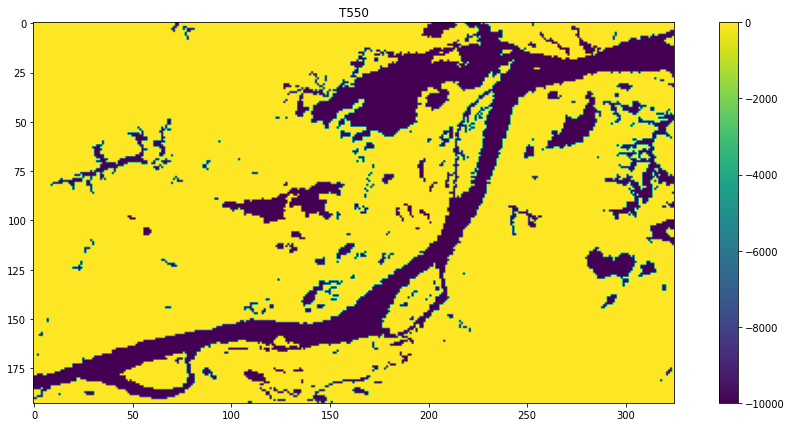

In [25]:
xmin, xmax, ymin, ymax = bbox(vertices)

%matplotlib inline

plt.rcParams['figure.figsize'] = [16, 7]
# plt.plot(polygon[:,1],polygon[:,0]*-1,c='k')
plt.imshow(band.data[ymin:ymax, xmin:xmax])
plt.colorbar()
plt.title(bname)
plt.show()

In [26]:
# Generate extraction mask
from skimage.draw import polygon
img = np.zeros(band.shape)
rr, cc = polygon(vertices[:,0], vertices[:,1], band.shape)
img[rr, cc] = 1

In [27]:
# Apply the mask and get the reflectance
syn_val = band[rr, cc]
syn_val.data.shape

(13030,)

In [28]:
# Create a DF from the extracted reflectance
custom_subset = {bname:syn_val.data,'x':rr,'y':cc}
df = pd.DataFrame(custom_subset)
df.head()

,T550,x,y
0,1.1659,672,2640
1,1.1422,673,2635
2,1.1482,673,2636
3,1.1541,673,2637
4,1.1541,673,2638


In [29]:
len(df)

13030

In [30]:
# drop outlier values (SYNERGY T550)
indexNames = df[df[bname] < -100].index
df.drop(indexNames, inplace=True)

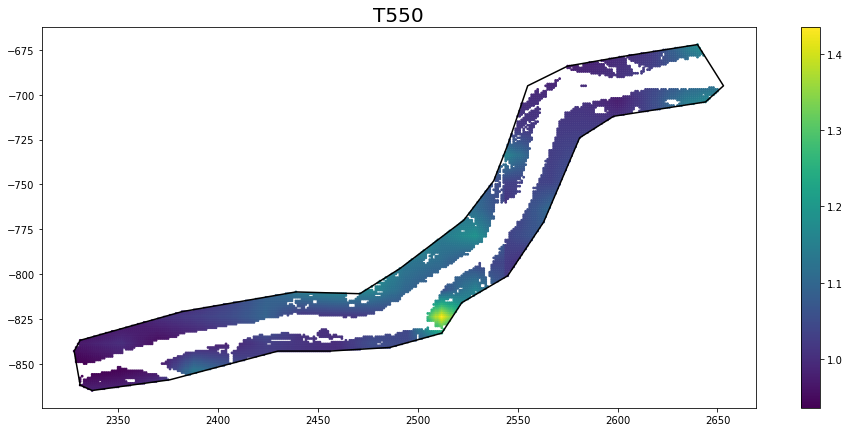

In [31]:
# Take a look over the data
plt.title(bname,fontsize=20)
plt.plot(vertices[:,1],vertices[:,0]*-1,c='k')
plt.scatter(df['y'],df['x']*-1,c=df[bname],s=3)
plt.colorbar()

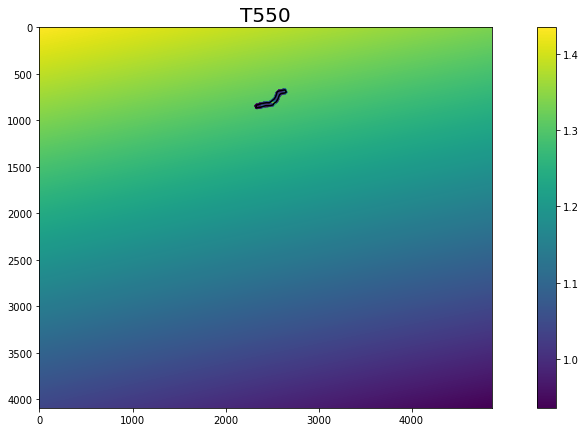

In [33]:
# Take a look over the data
plt.title(bname,fontsize=20)
plt.imshow(g_lat)
plt.plot(vertices[:,1],vertices[:,0],c='k')
plt.scatter(df['y'],df['x'],c=df[bname],s=3)
plt.colorbar()

In [34]:
df['lon'] = [g_lon[x,y] for x,y in zip(df['x'],df['y'])]

In [35]:
df['lat'] = [g_lat[x,y] for x,y in zip(df['x'],df['y'])]

In [36]:
df.head()

,T550,x,y,lon,lat
0,1.1659,672,2640,-60.490971,-3.286901
1,1.1422,673,2635,-60.502169,-3.287086
2,1.1482,673,2636,-60.499501,-3.287692
3,1.1541,673,2637,-60.496842,-3.288297
4,1.1541,673,2638,-60.496842,-3.288297


In [37]:
len(df)

7676

In [31]:
# df.to_csv('S3A_SY_2_SYN____20191104T135002_t550.csv',index=False)

## COMPARE WITH CAMS

In [6]:
# LINUX
ncs = "/d_drive_data/git-repos/cams_visu/cams_visu/test_dl/cams_2019.nc"

cams_nc = nc.Dataset(ncs,'r')

# get the longitude information
lons = cams_nc.variables['longitude'][:]
# get the latitude information
lats = cams_nc.variables['latitude'][:]
# extract the time dimension
time = cams_nc.variables['time']

# creating 2D grids for further plotting
lon_grid, lat_grid = np.meshgrid(lons, lats)

# just to be sure (:
nc_date = str(nc.num2date(time[1230], time.units, time.calendar))
nc_date

'2019-11-04 12:00:00'

In [12]:
# get the total Aerosol Optical Depth at 550nm 
aod550 = cams_nc.variables['aod550'][1230][:]

# get the total Aerosol Optical Depth at 865nm 
aod865 = cams_nc.variables['aod865'][1230][:]

In [25]:
# Manacapuru Centroid
query_lon, query_lat = -60.8911, -3.5726

mxy, query_aod_550 = exp.get_point_data_in_single_band(aod550,
                                  lon=lon_grid,lat=lat_grid,target_lon=query_lon,target_lat=query_lat)


_, query_aod_865 = exp.get_point_data_in_single_band(aod865,
                                  lon=lon_grid,lat=lat_grid,target_lon=query_lon,target_lat=query_lat)

mxy, query_aod_550, query_aod_865

((69, 89), 0.6058359062664995, 0.3127664394840741)

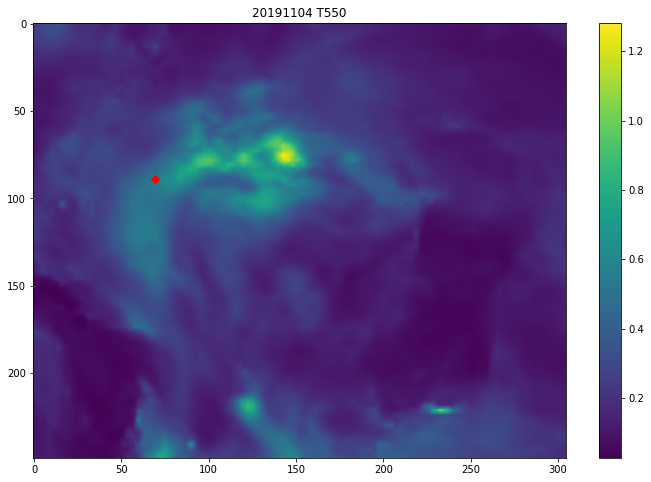

In [23]:
plt.title('20191104 T550')
plt.rcParams['figure.figsize'] = [12, 8]
plt.imshow(aod550)
plt.plot(mxy[0], mxy[1], 'rD')
plt.colorbar()

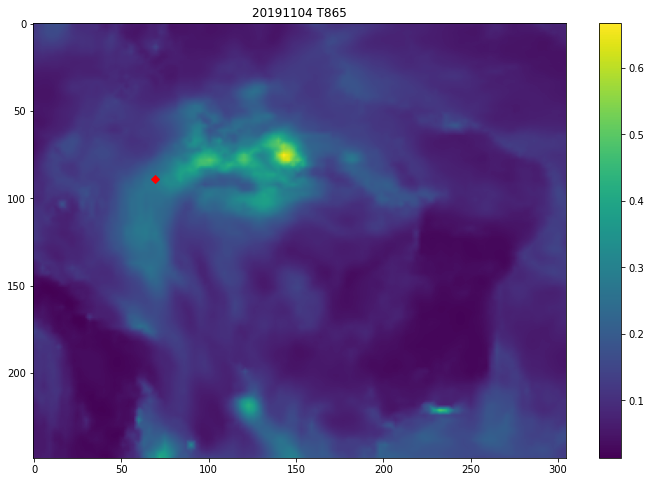

In [26]:
plt.title('20191104 T865')
plt.rcParams['figure.figsize'] = [12, 8]
plt.imshow(aod865)
plt.plot(mxy[0], mxy[1], 'rD')
plt.colorbar()